In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hitters-baseball-data/Hitters.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [3]:
df = pd.read_csv('../input/hitters-baseball-data/Hitters.csv').dropna()
df.count()
df['index'] = df.index
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,index
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,1
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,2
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,3
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,4
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,750.0,A,5


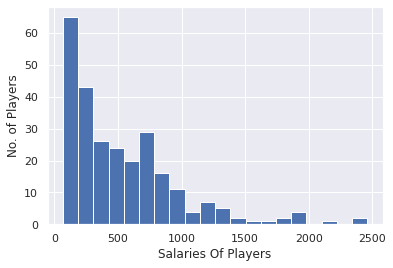

In [4]:
p1 = plt.hist(df['Salary'],bins = 20)
plt.xlabel('Salaries Of Players')
plt.ylabel('No. of Players')
plt.show()
plt.hist?

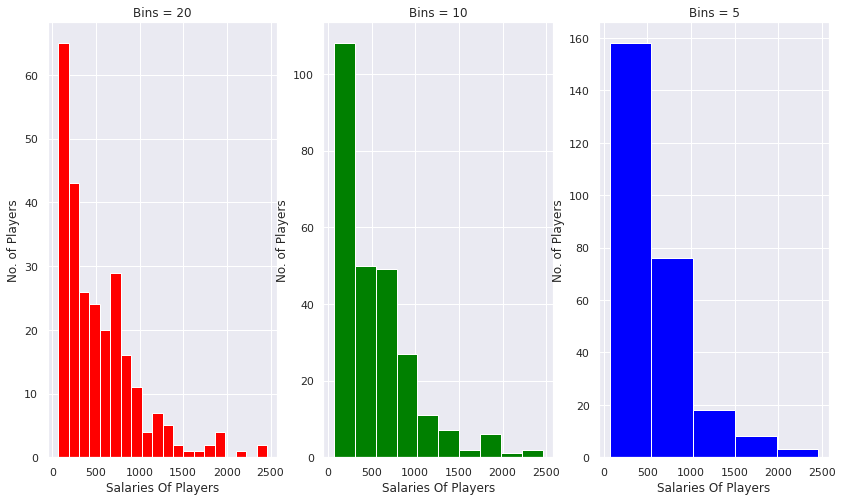

In [5]:
# BUILDING HISTOGRAM PLOT FOR SALARY AND OBSERVING HOW CONCLUSION CHANGES BY CHANGING NUMBER OF BINS
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
plt.hist(df['Salary'],bins = 20 , color ="red")
plt.xlabel('Salaries Of Players')
plt.ylabel('No. of Players')
plt.title('Bins = 20')
plt.subplot(1, 3, 2)
plt.hist(df['Salary'],bins = 10, color ="green")
plt.xlabel('Salaries Of Players')
plt.ylabel('No. of Players')
plt.title('Bins = 10')
plt.subplot(1, 3, 3)
plt.hist(df['Salary'],bins = 5, color ="blue")
plt.xlabel('Salaries Of Players')
plt.ylabel('No. of Players')
plt.title('Bins = 5')
plt.show()

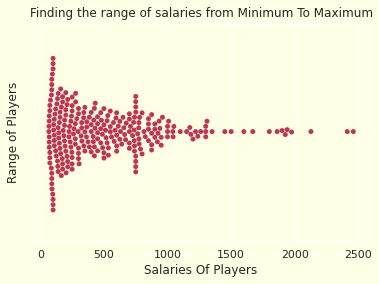

In [6]:
# BUILDING BEE SWARM PLOT FOR SALARY AND FINDING MINIMUM AND MAXIMUM RANGE
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"
p2 = sns.swarmplot( x = 'Salary', data = df , palette='inferno')
plt.title('Finding the range of salaries from Minimum To Maximum')
plt.xlabel('Salaries Of Players')
plt.ylabel('Range of Players')
plt.show()
sns.swarmplot?

[190. 425. 750.]
[ 4.  6. 10.]
[ 5.  9. 18.]


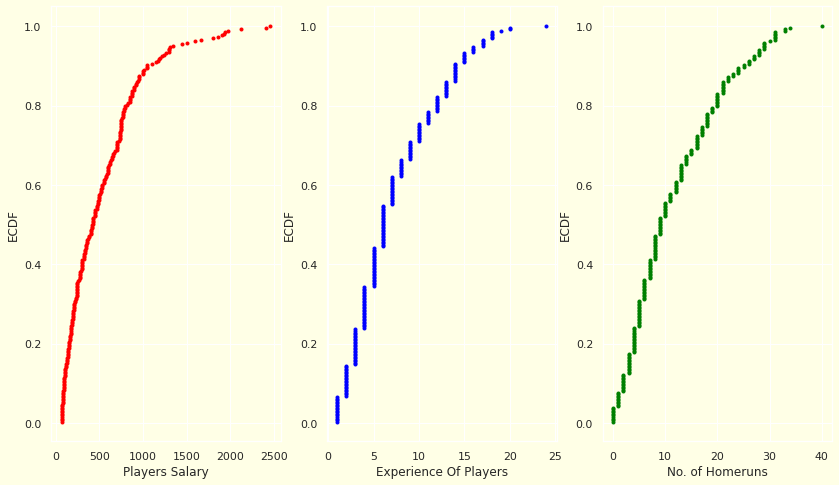

In [7]:

# BUILDING ECDF FUNCTIONS FOR SALARY, EXPERIENCE AND NO. OF HOMERUNS

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
x,y = ecdf(df['Salary'])
p3 = plt.plot(x, y, marker='.', linestyle='none', color = 'red')
plt.xlabel('Players Salary')
plt.ylabel('ECDF')
print(np.percentile(df['Salary'], [25,50,75]))

plt.subplot(1, 3, 2)
x,y = ecdf(df['Years'])
p3 = plt.plot(x, y, marker='.', linestyle='none', color = 'blue')
plt.xlabel('Experience Of Players')
plt.ylabel('ECDF')
print(np.percentile(df['Years'], [25,50,75]))

plt.subplot(1, 3, 3)
x,y = ecdf(df['HmRun'])
p3 = plt.plot(x, y, marker='.', linestyle='none' , color = 'green')
plt.xlabel('No. of Homeruns')
plt.ylabel('ECDF')
print(np.percentile(df['HmRun'], [25,50,75]))



plt.show()




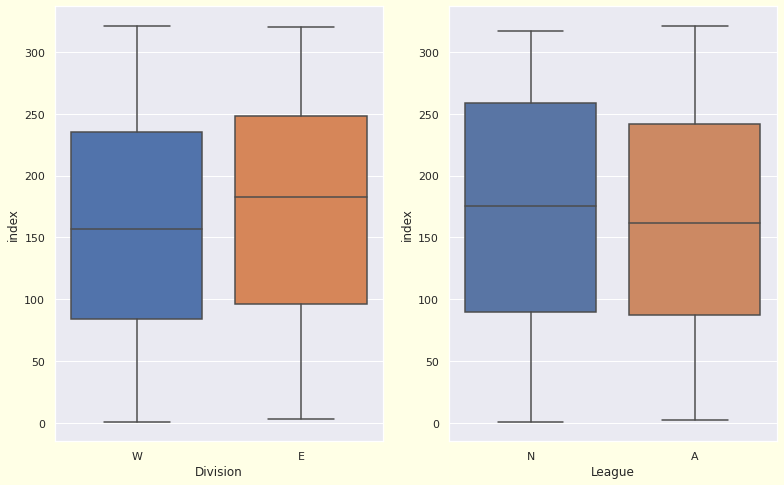

In [8]:
# BOXPLOT IS A ONESTOP SOLUTION TO INCULCATE PERCENTILE VALUES WITHIN THE GRAPHICAL REPRESENTATION OF THE DATA



plt.figure(figsize=(20,8))
sns.set()
plt.subplot(1,3,1)
sns.boxplot(y='index',x='Division',data=df , saturation=0.9)


plt.subplot(1,3,2)
sns.boxplot(y='index',x='League',data=df)



plt.show()


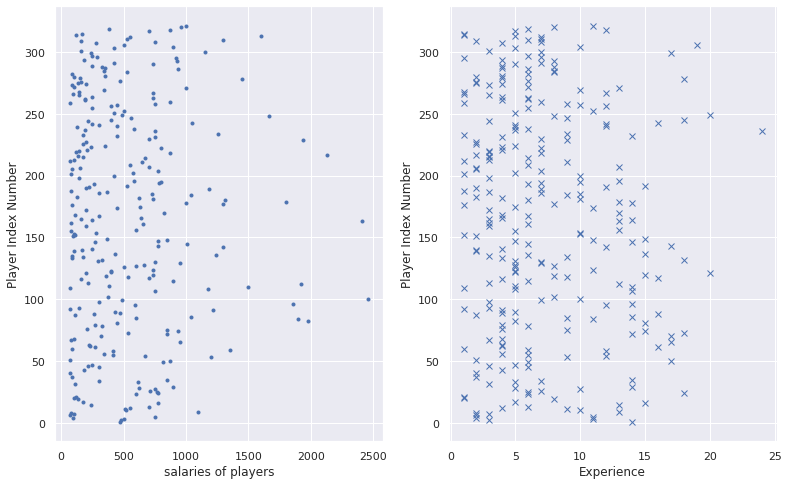

In [9]:
# Make a scatter plot

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.plot(df['Salary'],df['index'],marker ='.', linestyle='none')

plt.ylabel('Player Index Number')
plt.xlabel('salaries of players')

plt.subplot(1,3,2)
plt.plot(df['Years'],df['index'],marker ='x', linestyle='none')

plt.ylabel('Player Index Number')
plt.xlabel('Experience')

plt.show()

plt.plot?



In [10]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]


r = pearson_r(df['Salary'], df['Years'])

# Print the result
print(r)

0.40065699438268587


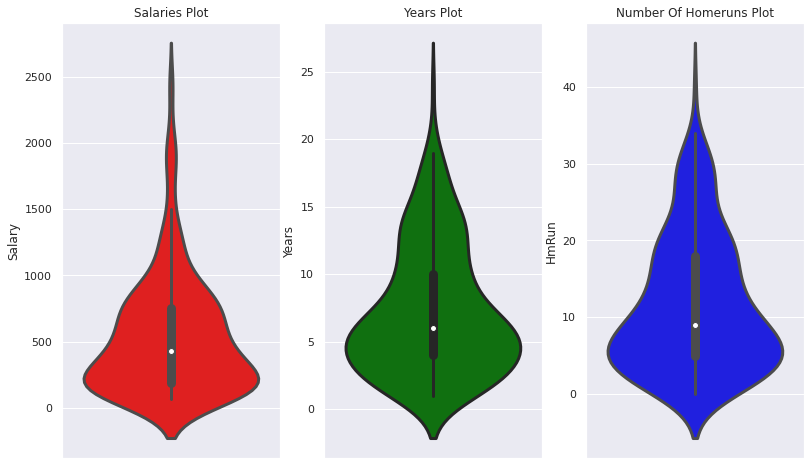

In [11]:

plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('Salaries Plot')
sns.violinplot(y=df['Salary'],data=df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('Years Plot')
sns.violinplot(y=df['Years'],data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('Number Of Homeruns Plot')
sns.violinplot(y=df['HmRun'],data=df,color='blue',linewidth=3)
plt.show()